(HW7)=
# HW7

**Deadline (hard only!)**: 24.04.2024 11:59 (GMT+5).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from glob import glob
%config InlineBackend.figure_format = 'svg'

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: 
            continue
        try:
            data.append(resize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify=labels)
    
    print("Done")
    return X_train, y_train, X_test, y_test

## Task description

In this notebook you are suggested to train several models of machine learning on the notMNIST dataset. To get full points per each model it must beat the **baseline** on test dataset. Models to test:

* logistic regression, 86% (**1 point**)
* k-nearest neigbors, 88% (**1 point**)
* MLP, 91% (**1 point**)
* CNN, 92% (**1.5 points**)
* overall comparison of models, including some graphs (e.g, bar plot) (**0.5 points**)

### Important notes

* The total time of execution of all cells must not exceed $10$ minutes
* Broken code in a section automatically implies $0$ points for this section
* Do not erase any existing cells
* Use magic cell %%time to measure the time of execution of heavy-computation cells
* For each model use the followind structure:
    1. Import and build model

    2. Fit model on train dataset

    3. Measure and print train and test accuracy

    4. Make predictions on test dataset

    5. Plot confusion matrix

    6. Plot 16 random samples from the test dataset with true labels and predicted classes
    
    7. Try different hyperparameters, plot graphs of accuracy vs most important parameters

## Load `notmnist` dataset

In [2]:
%%time
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
CPU times: total: 3.69 s
Wall time: 12.7 s


Size of train and test datasets:

In [3]:
X_train.shape, X_test.shape

((14043, 784), (4681, 784))

Verify that the classes are balanced:

In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1404, 1405, 1405, 1405, 1404, 1404, 1404, 1404, 1404, 1404],
       dtype=int64))

## Visualize some data

In [5]:
def plot_letters(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = chr(ord("A") + y_true[indices[i]])
        else:
            title = f"y={chr(ord('A') + y_true[indices[i]])}, ŷ={chr(ord('A') + y_pred[indices[i]])}"
        plt.title(title, size=20)
    plt.show()

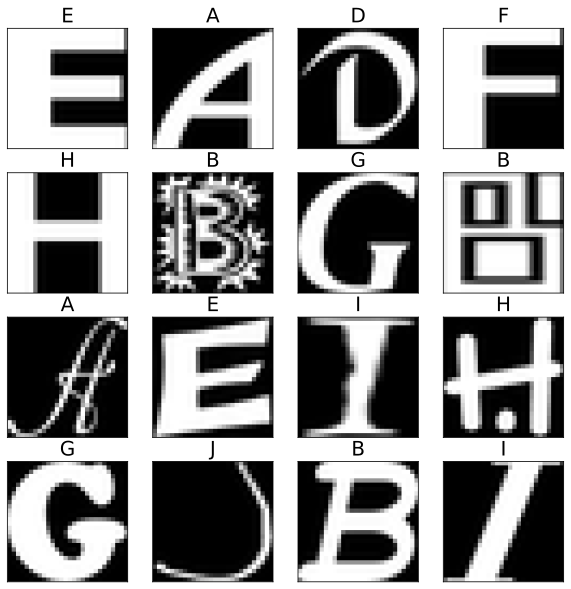

In [6]:
plot_letters(X_train, y_train, random_state=912)

## Logistic regression

**Hyperparameters**:
* regularization type (`penalty`)
* regularization constant ($C$)
* `max_iter`

In [7]:
%%time
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, random_state=40)
logistic_regression.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, logistic_regression.predict(X_train))
test_accuracy = accuracy_score(y_test, logistic_regression.predict(X_test))

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

logistic_regression_prediction = logistic_regression.predict(X_test)

Train Accuracy: 98.31%
Test Accuracy: 85.22%
CPU times: total: 50.5 s
Wall time: 11.3 s


Train accuracy: 0.9831
Test accuracy: 0.8522


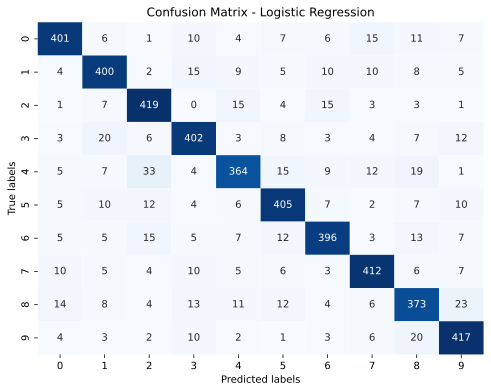

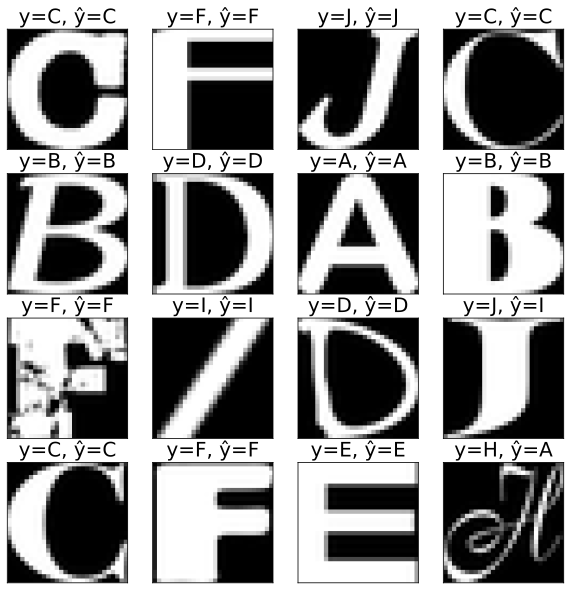

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X_train, y_train)

logistic_regression_model_train_acc = logistic_regression_model.score(X_train, y_train)
logistic_regression_model_test_acc = logistic_regression_model.score(X_test, y_test)
print(f"Train accuracy: {logistic_regression_model_train_acc:.4f}")
print(f"Test accuracy: {logistic_regression_model_test_acc:.4f}")

y_pred_log_reg = logistic_regression_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

plot_letters(X_test, y_test, y_pred_log_reg)

## kNN

**Hyperparameters**:
* `n_neigbors`
* `metric`

Train accuracy: 0.9187
Test accuracy: 0.8752


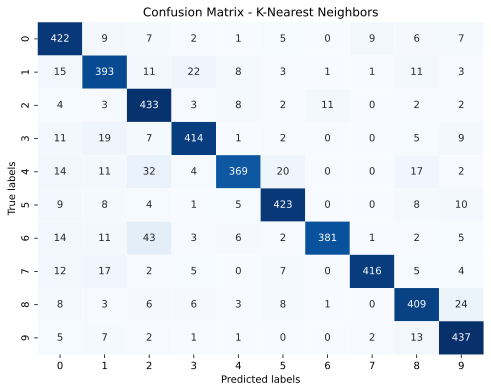

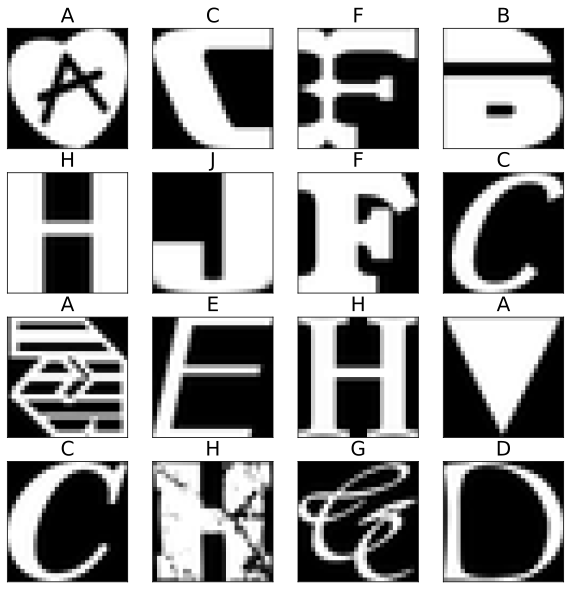

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

knn_model.fit(X_train, y_train)

knn_train_acc = knn_model.score(X_train, y_train)
knn_test_acc = knn_model.score(X_test, y_test)
print(f"Train accuracy: {knn_train_acc:.4f}")
print(f"Test accuracy: {knn_test_acc:.4f}")

y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

plot_letters(X_test, y_test, random_state = 1)

## MLP

**Hyperparameters**:
* number of layers
* width of layers
* activation function

Train accuracy: 0.9986
Test accuracy: 0.9163


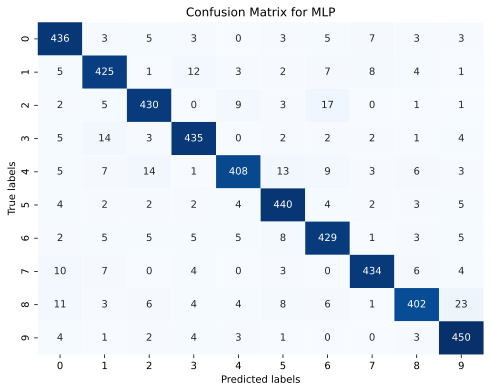

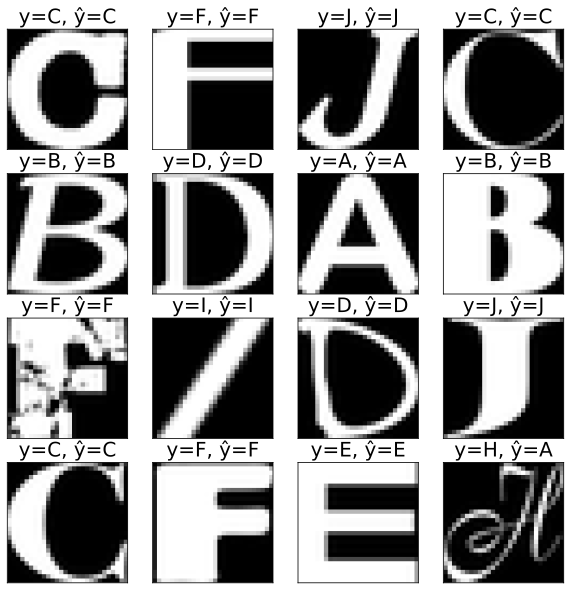

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100, random_state=42)

mlp_model.fit(X_train, y_train)

mlp_train_acc = mlp_model.score(X_train, y_train)
mlp_test_acc = mlp_model.score(X_test, y_test)
print(f"Train accuracy: {mlp_train_acc:.4f}")
print(f"Test accuracy: {mlp_test_acc:.4f}")

y_pred_mlp = mlp_model.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MLP')
plt.show()

plot_letters(X_test, y_test, y_pred_mlp)

## CNN

**Hyperparameters**:
* number of convolutional layers
* number of dense layers
* activation function

C:\Users\Nazym\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6120 - loss: 1.1680 - val_accuracy: 0.8651 - val_loss: 0.4166
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8670 - loss: 0.4464 - val_accuracy: 0.9000 - val_loss: 0.3287
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8950 - loss: 0.3373 - val_accuracy: 0.9082 - val_loss: 0.2950
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9139 - loss: 0.2890 - val_accuracy: 0.9092 - val_loss: 0.2885
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9192 - loss: 0.2589 - val_accuracy: 0.9171 - val_loss: 0.2732
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9248 - loss: 0.2277 - val_accuracy: 0.9160 - val_loss: 0.2838
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9350 - loss: 0.2025 - val_accuracy: 0.9138 - val_loss: 0.2889
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9406 - loss: 0.1857 - val_accu

<Figure size 800x600 with 0 Axes>

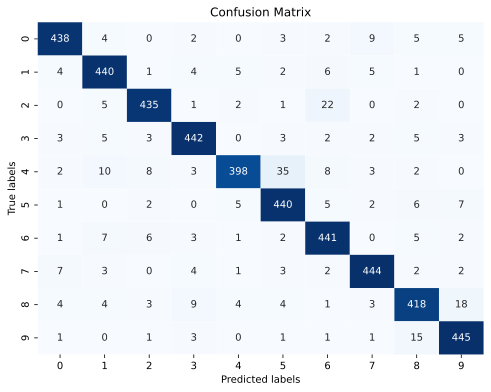

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


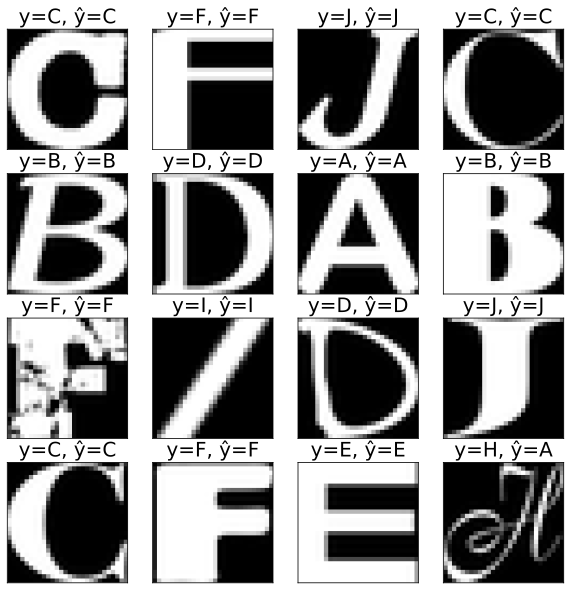

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Reshaping data to CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding of labels
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Importing and building mdoels
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training  the model for 20 epochs
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, validation_split=0.2)

# Evaluating the model performance
cnn_train_acc = cnn_model.evaluate(X_train_cnn, y_train_cnn, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
print(f"Train accuracy: {cnn_train_acc:.4f}")
print(f"Test accuracy: {cnn_test_acc:.4f}")

# Defining the plot_confusion_matrix function
def plot_confusion_matrix(model, X, y_true, cmap='Blues'):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Ploting confusion matrix for CNN
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnn_model, X_test_cnn, np.argmax(y_test_cnn, axis=1), cmap='Blues')


# Ploting 16 random samples for CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
plot_letters(X_test, np.argmax(y_test_cnn, axis=1), y_pred_cnn)


In [13]:
# !pip install tensorflow

Текущая кодовая страница: 1251
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/p

   ------------ ------------------------- 122.6/377.0 MB 464.7 kB/s eta 0:09:08
   ------------ ------------------------- 122.7/377.0 MB 465.0 kB/s eta 0:09:07
   ------------ ------------------------- 122.7/377.0 MB 465.6 kB/s eta 0:09:07
   ------------ ------------------------- 122.7/377.0 MB 466.0 kB/s eta 0:09:06
   ------------ ------------------------- 122.8/377.0 MB 466.3 kB/s eta 0:09:06
   ------------ ------------------------- 122.8/377.0 MB 466.6 kB/s eta 0:09:05
   ------------ ------------------------- 122.8/377.0 MB 467.0 kB/s eta 0:09:05
   ------------ ------------------------- 122.8/377.0 MB 467.0 kB/s eta 0:09:05
   ------------ ------------------------- 122.8/377.0 MB 467.0 kB/s eta 0:09:05
   ------------ ------------------------- 122.9/377.0 MB 467.6 kB/s eta 0:09:04
   ------------ ------------------------- 122.9/377.0 MB 467.6 kB/s eta 0:09:04
   ------------ ------------------------- 122.9/377.0 MB 467.3 kB/s eta 0:09:04
   ------------ ------------------------

## Plot results

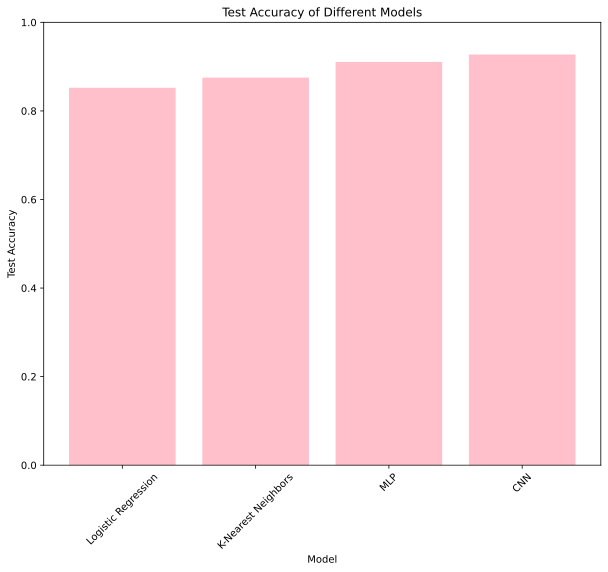

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Training Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_test_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# Training K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

# Training MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)
mlp_test_accuracy = accuracy_score(y_test, mlp_model.predict(X_test))

# Calculating test accuracy for CNN model
cnn_test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]

# Ploting the results
models = ['Logistic Regression', 'K-Nearest Neighbors', 'MLP', 'CNN']
test_accuracies = [lr_test_accuracy, knn_test_accuracy, mlp_test_accuracy, cnn_test_accuracy]

plt.figure(figsize=(10, 8))
plt.bar(models, test_accuracies, color='pink')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')

# Setting y-axis limit to [0, 1] for accuracy purposes
plt.ylim(0, 1) 

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


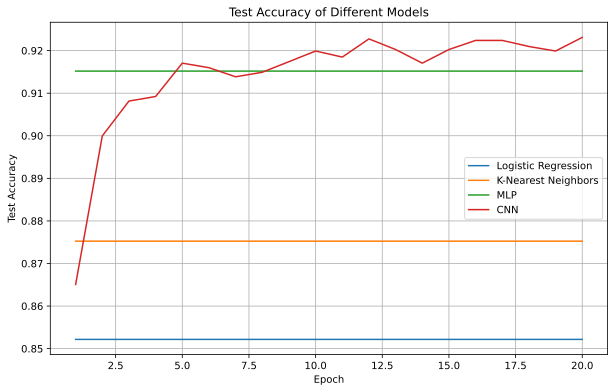

In [19]:
epochs = 20

# Lists to store the accuracy of each model at each epoch
lr_accs = []
knn_accs = []
mlp_accs = []
cnn_accs = []

# Training Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

for i in range(epochs):
    lr_accs.append(accuracy_score(y_test, lr_model.predict(X_test)))

# Training K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

for i in range(epochs):
    knn_accs.append(accuracy_score(y_test, knn_model.predict(X_test)))

# Training MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)
for i in range(epochs):
    mlp_accs.append(accuracy_score(y_test, mlp_model.predict(X_test)))

# Test accuracy for CNN model
cnn_accs = history.history['val_accuracy']

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), lr_accs, label='Logistic Regression')
plt.plot(range(1, epochs + 1), knn_accs, label='K-Nearest Neighbors')
plt.plot(range(1, epochs + 1), mlp_accs, label='MLP')
plt.plot(range(1, epochs + 1), cnn_accs, label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()
